<a href="https://colab.research.google.com/github/Ch-Vignesh/IDS/blob/main/salami2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install PyPDF2 pandas matplotlib seaborn tensorflow scikit-learn


In [ ]:
# Import libraries
import PyPDF2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Function to handle file upload and conversion
def handle_file_upload(file_path, output_csv_path):
    file_extension = os.path.splitext(file_path)[-1].lower()

    if file_extension == '.pdf':
        # Process PDF file
        pdf_reader = PyPDF2.PdfReader(file_path)
        data = []
        for page in pdf_reader.pages:
            lines = page.extract_text().split('\n')
            for line in lines:
                fields = line.split()
                if len(fields) >= 3:  # Assuming transaction fields: Date, Description, Amount
                    data.append(fields)
        df = pd.DataFrame(data, columns=['Date', 'Description', 'Amount'])

    elif file_extension == '.xlsx':
        # Process Excel file
        df = pd.read_excel(file_path)

    elif file_extension == '.csv':
        # Process CSV file
        df = pd.read_csv(file_path)
    else:
        raise ValueError("Unsupported file format! Please upload a PDF, CSV, or Excel file.")

    # Save as CSV for consistent processing
    df.to_csv(output_csv_path, index=False)
    return df

# Example usage
uploaded_file_path = '/content/drive/MyDrive/salami_data/salami_attack_data.csv'  # Replace with uploaded file path
output_csv_path = '/content/transactions.csv'

transactions_df = handle_file_upload(uploaded_file_path, output_csv_path)
print(transactions_df.head())


         Date   Description  Amount
0  2024-10-26       Grocery  480.31
1  2024-11-22  Utility Bill  349.98
2  2024-11-26      Shopping  257.94
3  2024-11-26  Utility Bill    0.03
4  2024-12-28        Dining  218.42


In [ ]:
# Load and preprocess the CSV
def preprocess_data(output_csv_path):
    df = pd.read_csv(output_csv_path)
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce').fillna(0)  # Convert Amount to numeric
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert Date to datetime
    df.dropna(inplace=True)  # Drop rows with NaN values
    return df

transactions_df = preprocess_data(output_csv_path)
print(transactions_df.head())


        Date   Description  Amount
0 2024-10-26       Grocery  480.31
1 2024-11-22  Utility Bill  349.98
2 2024-11-26      Shopping  257.94
3 2024-11-26  Utility Bill    0.03
4 2024-12-28        Dining  218.42


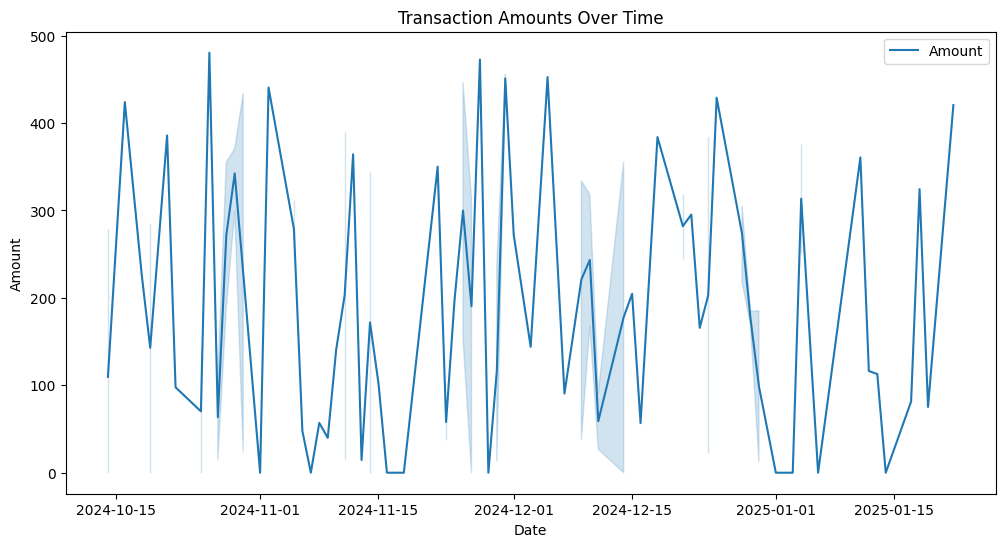

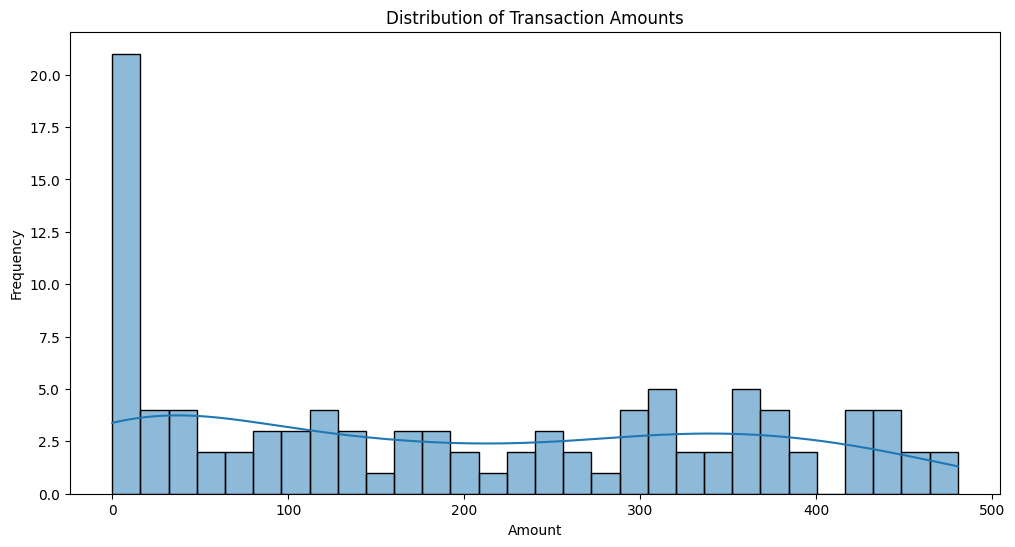

In [ ]:
# Visualize transactions
def visualize_data(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Date', y='Amount', label='Amount')
    plt.title('Transaction Amounts Over Time')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='Amount', bins=30, kde=True)
    plt.title('Distribution of Transaction Amounts')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

visualize_data(transactions_df)


In [ ]:
# Neural network model
def build_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output: 1 for anomaly, 0 for normal
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for training
def prepare_data(df):
    scaler = MinMaxScaler()
    features = scaler.fit_transform(df[['Amount']])
    labels = (df['Amount'] % 0.01 != 0).astype(int)  # Simulated anomaly labels for salami attack
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, scaler

X_train, X_test, y_train, y_test, scaler = prepare_data(transactions_df)
model = build_model(input_dim=X_train.shape[1])
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9273 - loss: 0.6832 - val_accuracy: 0.7500 - val_loss: 0.6576
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9585 - loss: 0.6424 - val_accuracy: 0.7500 - val_loss: 0.6272
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9602 - loss: 0.6075 - val_accuracy: 0.7500 - val_loss: 0.5990
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9030 - loss: 0.5770 - val_accuracy: 0.7500 - val_loss: 0.5736
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9411 - loss: 0.5349 - val_accuracy: 0.7500 - val_loss: 0.5494
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9394 - loss: 0.5081 - val_accuracy: 0.7500 - val_loss: 0.5267
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9273 - loss: 0.4732 - val_accuracy: 0.7500 - val_loss: 0.5054
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9090 - loss: 0.4497 - val_accuracy: 0.7500 - val_loss: 0.4860
Epoch 9/20


In [ ]:
def detect_salami_attack(model, df, scaler):
    # Transform the data using the scaler
    features = scaler.transform(df[['Amount']])
    predictions = model.predict(features)
    df['Anomaly_Score'] = predictions

    # Filter anomalies based on the threshold
    anomalies = df[df['Anomaly_Score'] > 0.5]  # Threshold for anomaly detection

    if anomalies.empty:
        print("No salami attack detected.")
    else:
        print("Salami attack detected!")

        # Filter for small amounts (potential salami attack transactions)
        salami_transactions = anomalies[anomalies['Amount'] < 0.1]  # Transactions under $0.10

        if salami_transactions.empty:
            print("No salami attack transactions found.")
        else:
            print(f"Number of potential salami attack transactions: {len(salami_transactions)}")
            print("\nPotential salami attack transactions:")
            print(salami_transactions[['Date', 'Description', 'Amount', 'Anomaly_Score']])

            # Calculate total amount in threat
            total_amount_in_threat = salami_transactions['Amount'].sum()
            print(f"\nTotal amount in threat: {total_amount_in_threat:.2f}")

    return salami_transactions

# Call the function
salami_transactions = detect_salami_attack(model, transactions_df, scaler)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Salami attack detected!
Number of potential salami attack transactions: 17

Potential salami attack transactions:
         Date    Description  Amount  Anomaly_Score
3  2024-11-26   Utility Bill    0.03       0.772643
12 2024-10-19           Fuel    0.04       0.772653
13 2024-11-18  Miscellaneous    0.02       0.772633
18 2025-01-03       Shopping    0.02       0.772633
29 2025-01-01  Miscellaneous    0.02       0.772633
30 2024-10-25  Miscellaneous    0.02       0.772633
48 2024-11-28         Dining    0.03       0.772643
52 2024-10-14         Dining    0.03       0.772643
64 2024-11-07   Utility Bill    0.05       0.772663
65 2024-12-14       Shopping    0.04       0.772653
66 2024-11-01   Utility Bill    0.02       0.772633
73 2024-10-14        Grocery    0.04       0.772653
80 2024-11-14         Dining    0.04       0.772653
81 2025-01-14       Shopping    0.01       0.772623
86 2024-10-14         Dining    0.03       0.772643
92 2024-11-16   

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Salami attack detected!
Number of potential salami attack transactions: 17

Potential salami attack transactions:
         Date    Description  Amount  Anomaly_Score
3  2024-11-26   Utility Bill    0.03       0.772643
12 2024-10-19           Fuel    0.04       0.772653
13 2024-11-18  Miscellaneous    0.02       0.772633
18 2025-01-03       Shopping    0.02       0.772633
29 2025-01-01  Miscellaneous    0.02       0.772633
30 2024-10-25  Miscellaneous    0.02       0.772633
48 2024-11-28         Dining    0.03       0.772643
52 2024-10-14         Dining    0.03       0.772643
64 2024-11-07   Utility Bill    0.05       0.772663
65 2024-12-14       Shopping    0.04       0.772653
66 2024-11-01   Utility Bill    0.02       0.772633
73 2024-10-14        Grocery    0.04       0.772653
80 2024-11-14         Dining    0.04       0.772653
81 2025-01-14       Shopping    0.01       0.772623
86 2024-10-14         Dining    0.03       0.772643
92 2024-11-16   

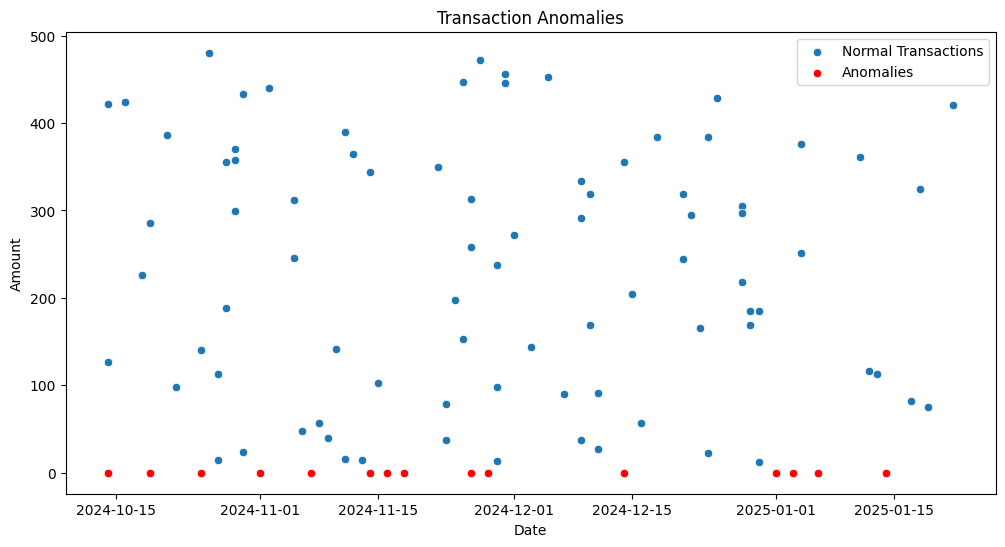

In [ ]:
anomalies = detect_salami_attack(model, transactions_df, scaler)

def visualize_anomalies(df, anomalies):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Date', y='Amount', label='Normal Transactions')
    sns.scatterplot(data=anomalies, x='Date', y='Amount', color='red', label='Anomalies')
    plt.title('Transaction Anomalies')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.show()

visualize_anomalies(transactions_df, anomalies)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2444
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1922
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1833
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1869
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1621
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1397
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1368
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1078
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1066
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1148
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1102
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1153
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1064
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1129
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0978
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/

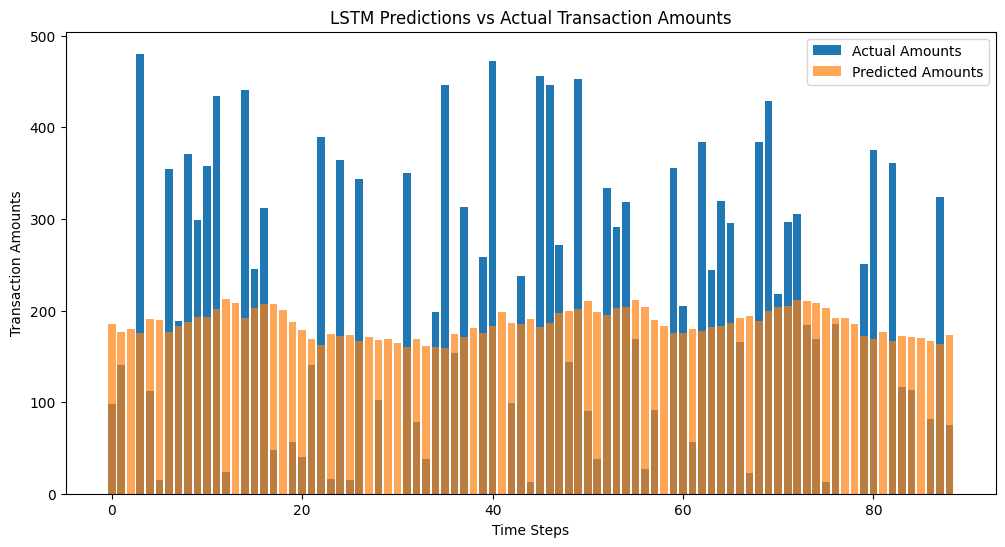

In [ ]:
# prompt: generate a lstm model to study my transactions from /content/drive/MyDrive/salami_data/salami_attack_data.csv over time and visualise it in a bar graph

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv('/content/drive/MyDrive/salami_data/salami_attack_data.csv')

# Preprocess the data
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce').fillna(0)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.dropna(inplace=True)
data = data.sort_values(by='Date')

# Normalize the 'Amount' column
scaler = MinMaxScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Prepare the data for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10  # Adjust sequence length as needed
X, y = create_sequences(data['Amount'].values, seq_length)
X = X.reshape(X.shape[0], seq_length, 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, batch_size=32)  # Adjust epochs and batch size

# Make predictions
predictions = model.predict(X)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)
y = scaler.inverse_transform(y.reshape(-1, 1))

# Visualize the results
plt.figure(figsize=(12, 6))
# Convert y to a 1D array using flatten() or ravel()
plt.bar(range(len(y)), y.flatten(), label='Actual Amounts')
plt.bar(range(len(predictions)), predictions.flatten(), label='Predicted Amounts', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('Transaction Amounts')
plt.title('LSTM Predictions vs Actual Transaction Amounts')
plt.legend()
plt.show()
